## Data Dictionary

There are multiple variables in the dataset which can be cleanly divided in 3 categories:

### Demographic information about customers
> * __customer_id__ - Customer id
> * __vintage__ - Vintage of the customer with the bank in number of days
> * __age__ - Age of customer
> * __gender__ - Gender of customer
> * __dependents__ - Number of dependents
> * __occupation__ - Occupation of the customer 
> * __city__ - City of customer (anonymised)


### Customer Bank Relationship
> * __customer_nw_category__ - Net worth of customer (3:Low 2:Medium 1:High)
>* __branch_code__ - Branch Code for customer account
>* __days_since_last_transaction__ - No of Days Since Last Credit in Last 1 year


### Transactional Informatio
> * __current_balance__ - Balance as of toda
> * __previous_month_end_balance__ - End of Month Balance of previous month
> * __average_monthly_balance_prevQ__ - Average monthly balances (AMB) in Previous Quarter
> * __average_monthly_balance_prevQ2__ - Average monthly balances (AMB) in previous to previous quarter
> * __current_month_credit__ - Total Credit Amount current month
> * __previous_month_credit__ - Total Credit Amount previous month
> * __current_month_debit__ - Total Debit Amount current month
> * __previous_month_debit__ - Total Debit Amount previous month
> * __current_month_balance__ - Average Balance of current month
> * __previous_month_balance__ - Average Balance of previous month
> * __churn__ - Average balance of customer falls below minimum balance in the next quarter (1/0)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('churn_prediction_simple.csv')
data.head()

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,days_since_last_transaction,...,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
0,1,3135,66,0,0.0,0,187.0,2,755,224.0,...,1458.71,1458.71,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,0
1,6,2531,42,0,2.0,0,1494.0,3,388,58.0,...,1401.72,1643.31,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16,1
2,7,263,42,1,0.0,0,1096.0,2,1666,60.0,...,16059.34,15211.29,13798.82,0.36,0.36,857.50,286.07,15719.44,15349.75,0
3,8,5922,72,0,0.0,1,1020.0,1,1,98.0,...,7714.19,7859.74,11232.37,0.64,0.64,1299.64,439.26,7076.06,7755.98,0
4,9,1145,46,0,0.0,0,623.0,2,317,172.0,...,8519.53,6511.82,16314.17,0.27,0.27,443.13,5688.44,8563.84,5317.04,0


In [3]:
# data.dropna()     --> remove all the rows with missing values.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22067 entries, 0 to 22066
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   customer_id                     22067 non-null  int64  
 1   vintage                         22067 non-null  int64  
 2   age                             22067 non-null  int64  
 3   gender                          22067 non-null  int64  
 4   dependents                      22067 non-null  float64
 5   occupation                      22067 non-null  int64  
 6   city                            22067 non-null  float64
 7   customer_nw_category            22067 non-null  int64  
 8   branch_code                     22067 non-null  int64  
 9   days_since_last_transaction     22067 non-null  float64
 10  current_balance                 22067 non-null  float64
 11  previous_month_end_balance      22067 non-null  float64
 12  average_monthly_balance_prevQ   

``churn`` is our target variable.

In [4]:
# checking dataset distribution
data['churn'].value_counts()/len(data)

0    0.806317
1    0.193683
Name: churn, dtype: float64

### Note :
1. We can clearly see the classess are rouhly in the ratio of 80 to 20.
2. So the data seems to be imbalanced.

In [5]:
# Separating dependent & independent variables.
X = data.drop(columns = ['churn', 'customer_id'])
Y = data['churn']

### Scalling the dataset.

In [6]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_X = scaler.fit_transform(X)

### Splitting the data into train data and test data.

In [7]:
from sklearn.model_selection import train_test_split as tts
x_train, x_test, y_train, y_test = tts(scaled_X,  Y, train_size = 0.80, stratify = Y)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(17653, 19)
(4414, 19)
(17653,)
(4414,)


# Model building, Predictions & Odd ratio

In [8]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(class_weight='balanced')

In [9]:
classifier.fit(x_train, y_train)

LogisticRegression(class_weight='balanced')

In [10]:
# predictions
predicted_values = classifier.predict(x_test)
predicted_probabilities = classifier.predict_proba(x_test)

In [11]:
print(predicted_values)

[1 1 0 ... 0 1 0]


In [12]:
print(predicted_probabilities)
print(predicted_probabilities.shape)

[[0.46869065 0.53130935]
 [0.46396152 0.53603848]
 [0.5586491  0.4413509 ]
 ...
 [0.50667945 0.49332055]
 [0.46761999 0.53238001]
 [0.51182253 0.48817747]]
(4414, 2)


In [13]:
# Confusion metrics
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, predicted_values)
print(cm)

[[2615  944]
 [ 332  523]]


In [14]:
# accuracy :
print(round(classifier.score(x_test, y_test), 2))

0.71


In [15]:
round(accuracy_score(y_test, predicted_values),2)

0.71

# Evaluation Metrics : 

In [16]:
# accuracy :
print('Accuracy =',round(classifier.score(x_test, y_test), 2))

Accuracy = 0.71


### Precision score

In [17]:
# Calculating precision score
from sklearn.metrics import precision_score
precision = precision_score(y_test, predicted_values)
print(round(precision, 2))

0.36


``Meaning`` : 36% of the observations have been predicted as __false positive__

### Recall score

In [18]:
from sklearn.metrics import recall_score
recall = recall_score(y_test, predicted_values)
print(round(recall, 2))

0.61


``Meaning`` : Out of all actual observations only 61% of the observations have been predicted as __Positive__

__Question__. Which one to choose ?
1. The case we are looking at a Business case, where we are tryig to retain customers who are churning.
2. In such scenarios we may offeres gifts and voucheres to these customers, which might help to stay.
3. But these offeres or gifts shouldn't be apple watch, or new home. This could affect on company.
4. In other words ___we should be looking to maximize the recall in this case; as we are okay with false positive.___

We still dont know which one to pick, therefore we calculate f1 score.

### F1 score  

f1 score is harmonic mean of precision and recall.
1. f1 score : calculated manually
2. f1 score : with the predefined library 
3. To pick the model, f1 score should be __greater than 0.50__

In [19]:
# f1 score manually
f1 = 2/((1/precision) + (1/recall))
print(round(f1, 2))

0.45


In [20]:
# f1 by sklearn 
from sklearn.metrics import f1_score
F1 = f1_score(y_test, predicted_values)
print(round(F1, 2))

0.45


Our model is far from the good model as the ``f1`` score is 0.45 less than 0.50

## Calculating precision, recall, f1-score and support at once.

In [21]:
from sklearn.metrics import precision_recall_fscore_support as PRF_summary
Precision, Recall, F1, Support = PRF_summary(y_test, predicted_values)

print('Precision',Precision)
print('-'*90)
print('Recall', Recall)
print('-'*90)
print('F1', F1)

Precision [0.88734306 0.35650988]
------------------------------------------------------------------------------------------
Recall [0.73475695 0.61169591]
------------------------------------------------------------------------------------------
F1 [0.80387335 0.45047373]


1. The precision_recall_fscore_support function __returns__ the metrics with respect to __both of the classes.__
2. i.e class 1 = 0, class 2 = 1
3. Well the representation of these metrics is __not very intuitive__. Structured representation would be good for quick insights.
4. For that we use following method.

In [22]:
from sklearn.metrics import classification_report
k = classification_report(y_test, predicted_values)
print(k)

              precision    recall  f1-score   support

           0       0.89      0.73      0.80      3559
           1       0.36      0.61      0.45       855

    accuracy                           0.71      4414
   macro avg       0.62      0.67      0.63      4414
weighted avg       0.78      0.71      0.74      4414



**Note** : Drawback of this function that we can not the values of this function as it meant for representation purpose !!

# Precision - Recall curve
Precision and Recall tend to have trade off between them, Lets try to visualize them.

In [23]:
# Gathering precision/recall scores for different thresholds
from sklearn.metrics import precision_recall_curve as  prc
precision_points, recall_points, threshold_points = prc(y_test, predicted_probabilities[:,1])

print(precision_points.shape)
print(recall_points.shape)
print(threshold_points.shape)

(4407,)
(4407,)
(4406,)


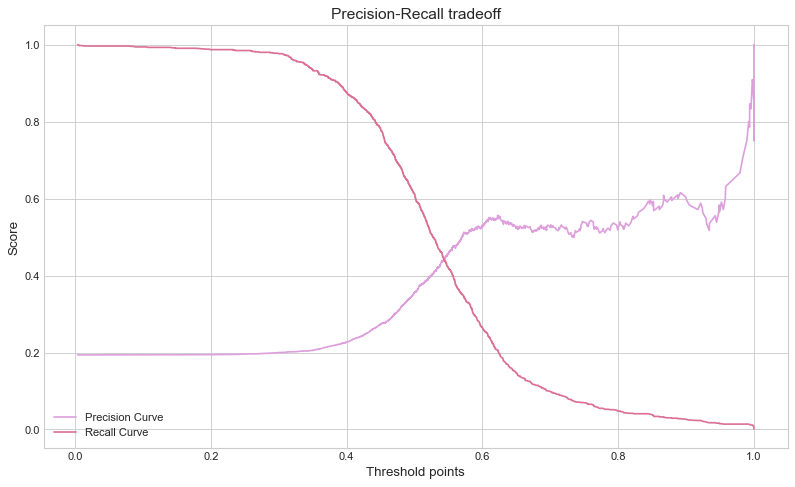

In [24]:
# visualizing the curve.
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(12,7), dpi=80)
plt.plot(threshold_points, precision_points[:-1], color = 'plum', label = 'Precision Curve')
plt.plot(threshold_points, recall_points[:-1], color = 'palevioletred', label = 'Recall Curve')
plt.xlabel('Threshold points', fontsize =12)
plt.ylabel('Score', fontsize =12)
plt.title('Precision-Recall tradeoff', fontsize = 14)
plt.legend()
plt.show()

### Note :
1. As the precision of the model increase, Recall decreases.
2. All though the performance's not great but we can infer __intersection point__ is somewhere near 0.55 threshold, which should be a __great threshold__ for the __maximum performance__ of the classifier model.

# AUC - ROC curve
1. ``AUC-ROC`` curve is a performance measurement for classification problems at various threshold settings.
2. __Higher__ the AUC-ROC better the model is at predicting 0s and 1s.
3. Works well when we have balanced data.
4. To implement this curve we need to calculate the __'TPR':True Positive Rate__, __'FPR':False Positive Rate__ & __Threshold__ value.

In [25]:
from sklearn.metrics import roc_curve, roc_auc_score
fpr, tpr, threshold = roc_curve(y_test, predicted_probabilities[:, 1])

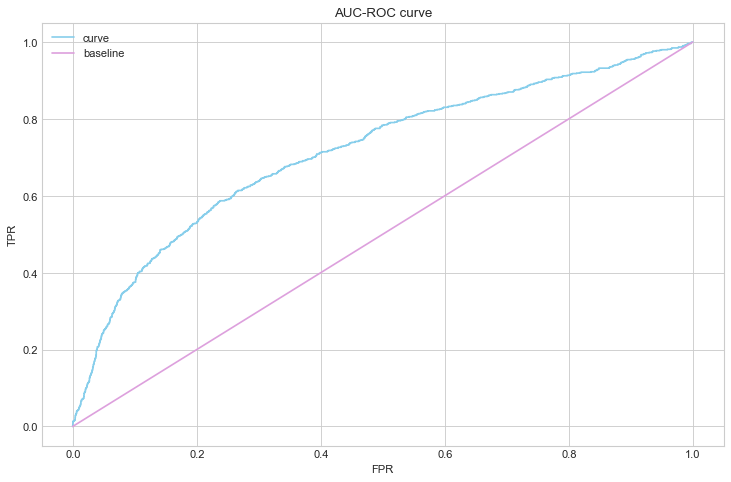

ROC score : 0.72


In [26]:
# Visualization of curv.
plt.figure(figsize=(11, 7), dpi=80)
plt.plot(fpr, tpr, label = 'curve', color = 'skyblue')
plt.plot([0, 1], [0, 1], label = 'baseline', color = 'plum')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('AUC-ROC curve')
plt.legend()
plt.show()

print('ROC score :', round(roc_auc_score(y_test, predicted_probabilities[:,1]),2)) 

# Coefficient plot

In [27]:
# Arranging the data.
c = classifier.coef_.reshape(-1)
x = X.columns

coeff_plot = pd.DataFrame({'Coefficients': c, 'Variables': x})

# Sorting the values.
coeff_plot = coeff_plot.sort_values(by = 'Coefficients')
coeff_plot.head()

,Coefficients,Variables
9,-2.062039,current_balance
13,-0.344216,current_month_credit
18,-0.208210,previous_month_balance
0,-0.183635,vintage
8,-0.140283,days_since_last_transaction


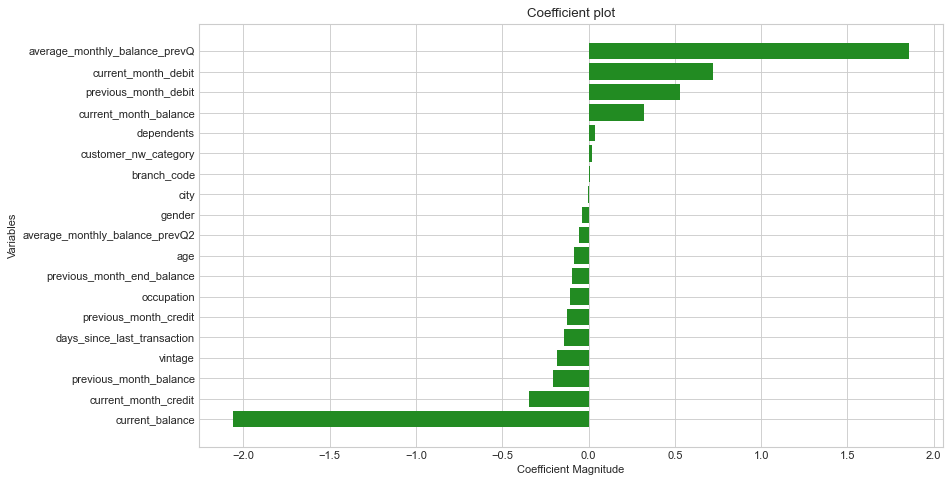

In [28]:
# Visualizing the into the a graph for better understandings
plt.figure(figsize=(12,7), dpi=80)
plt.barh(coeff_plot['Variables'], coeff_plot['Coefficients'], color = 'forestgreen')
plt.xlabel('Coefficient Magnitude')
plt.ylabel('Variables')
plt.title('Coefficient plot') 
plt.show()

### Note.
1. According to this coefficient plot ``averange_monthly_balance_prevQ``, ``current_month_debit``, ``previous_month_debit`` are the factors which worked in favour of class 1 i.e __Higher__ these values, higher the chances that the customer would churn, which makes sense too. As the customer makes more debits to his account is __less__ likely to stay as he's withdrawing money from the bank account.
2. On the other hand variables like ``current_balance``, ``current_month_credit`` are the factors that indicates that the customers are less likely to churn.